In [4]:
# install packages
!pip install squarify

In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker

In [43]:
# Import dataset
df = pd.read_csv('unemployement-rate-1948-2010.csv')
print (df)

       Series id  Year Period  Value
0    LNS14000000  1948    M01    3.4
1    LNS14000000  1948    M02    3.8
2    LNS14000000  1948    M03    4.0
3    LNS14000000  1948    M04    3.9
4    LNS14000000  1948    M05    3.5
..           ...   ...    ...    ...
741  LNS14000000  2009    M10   10.1
742  LNS14000000  2009    M11   10.0
743  LNS14000000  2009    M12   10.0
744  LNS14000000  2010    M01    9.7
745  LNS14000000  2010    M02    9.7

[746 rows x 4 columns]


In [44]:
# Tree Map
# Group by function for Year and Value
n = df.groupby('Year')[['Value']].sum()
print(n)

      Value
Year       
1948   45.0
1949   72.6
1950   62.5
1951   39.4
1952   36.3
...     ...
2006   55.3
2007   55.3
2008   69.8
2009  111.3
2010   19.4

[63 rows x 1 columns]


In [45]:
# extract the data and labels as lists 
a = df.groupby('Year')[['Value']].sum().index.get_level_values(0).tolist()
print(a)

[1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [46]:
# get the values corresponding to these labels
d = df.groupby('Year')[['Value']].sum().Value.values.tolist()
print(d)

[45.0, 72.6, 62.5, 39.4, 36.3, 35.1, 67.1, 52.4, 49.5, 51.6, 82.1, 65.4, 66.5, 80.3, 66.8, 67.7, 61.9, 54.1, 45.5, 46.1, 42.7, 41.9, 59.8, 71.4, 67.2, 58.3, 67.7, 101.7, 92.4, 84.6, 72.8, 70.2, 86.1, 91.4, 116.5, 115.2, 90.1, 86.3, 84.0, 74.1, 65.9, 63.1, 67.4, 82.2, 89.9, 82.9, 73.2, 67.1, 64.9, 59.3, 54.0, 50.6, 47.6, 56.9, 69.4, 71.9, 66.5, 61.0, 55.3, 55.3, 69.8, 111.3, 19.4]


Text(0.5, 1.0, 'Cumuative Unemployment Rate from 1948 to 2010')

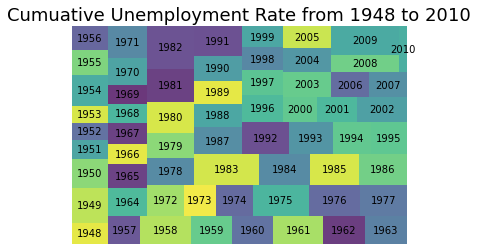

In [47]:
# Tree Map
axis = squarify.plot(sizes=d, label=a, alpha=.8)
plt.axis('off')
#plt.show()
axis.set_title("Cumuative Unemployment Rate from 1948 to 2010", fontsize=18)

In [48]:
# Area Chart and Stacked Area Chart
bins = [0, 200, 400, 600, 800, np.inf]
labels = ["0-199", "200-399", "400-599", "600-799", "800+"]
df_unstack = df.groupby(['Year','Period']).sum().unstack()

Text(0.5, 0, 'Number of Months from 1948 to 2010')

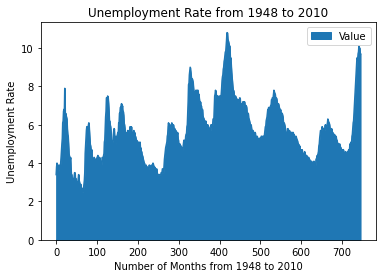

In [72]:
# Area chart
ax = df.plot.area(y='Value', title="Unemployment Rate from 1948 to 2010")
ax.set_ylabel('Unemployment Rate')
ax.set_xlabel('Number of Months from 1948 to 2010')

Text(0, 0.5, 'Cumulative Unemployment')

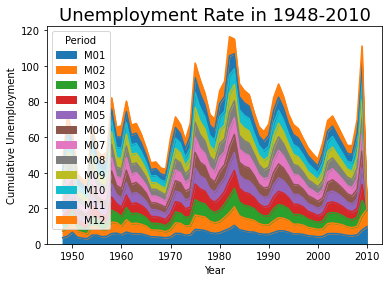

In [50]:
# Stacked Area Chart
plt =df_unstack.plot(kind='area',y='Value', stacked = True)
plt.set_title("Unemployment Rate in 1948-2010", fontsize=18)
plt.set_xlabel('Year')
plt.set_ylabel('Cumulative Unemployment')

Text(0, 0.5, 'Cumulative Unemployment')

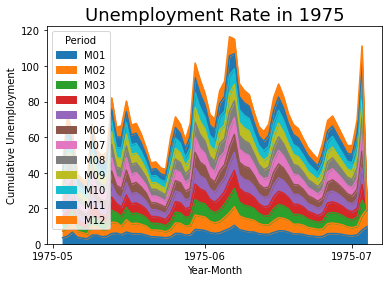

In [58]:
# Stacked Area Chart
df_unstack = df.groupby(['Year','Period']).sum().unstack()
plt =df_unstack.plot(kind='area',y='Value', stacked = True)

date_form = DateFormatter("%Y-%m")
plt.xaxis.set_major_formatter(date_form)
plt.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.set_title("Unemployment Rate in 1975", fontsize=18)
plt.set_xlabel('Year-Month')
plt.set_ylabel('Cumulative Unemployment')